# importation


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


In [ ]:

data = pd.read_csv('/content/drive/My Drive/NLP/data.csv', encoding='ISO-8859-1')

NameError: name 'pd' is not defined

In [ ]:
data.head(15)

NameError: name 'data' is not defined

# Analyse Exploratoire

Numeric Columns: ['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
Categorical Columns: ['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet', 'Age of User', 'Country']


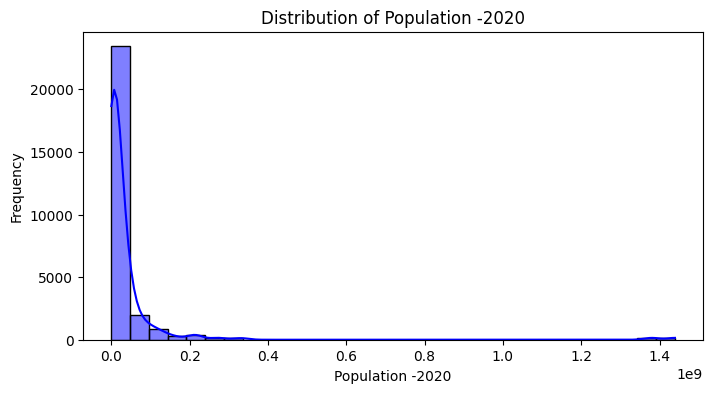

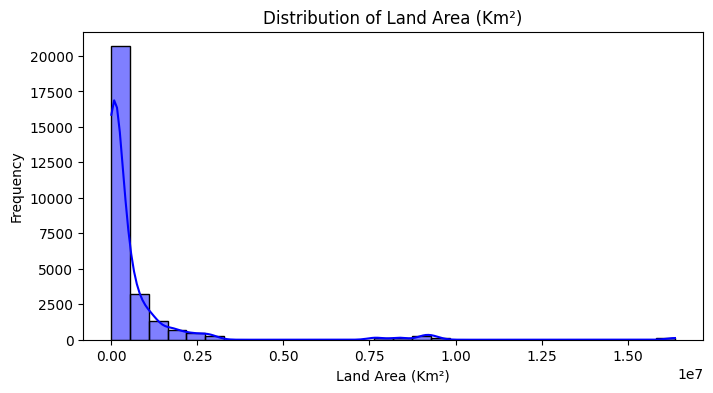

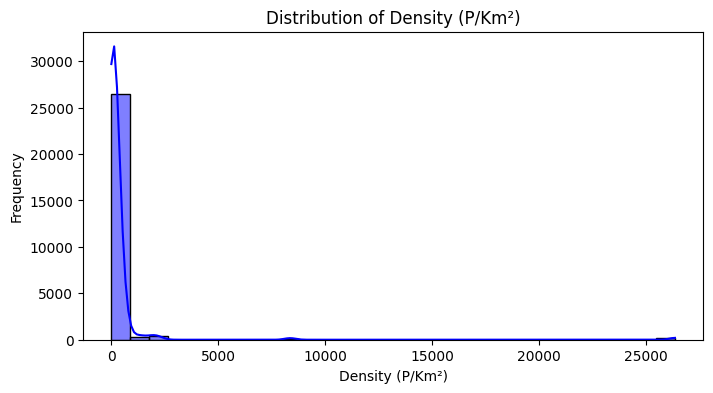

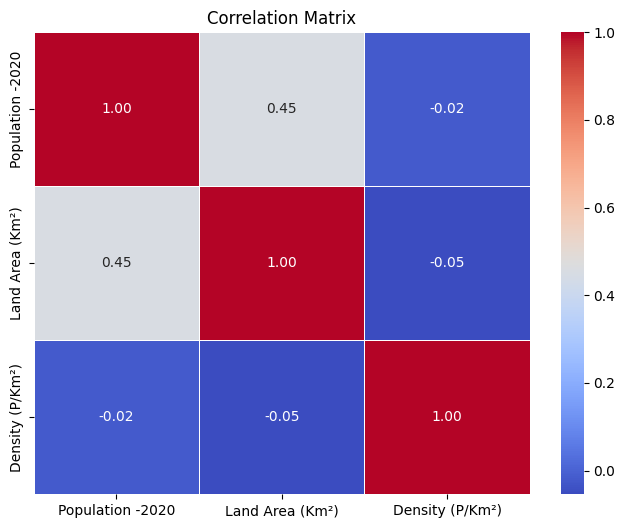

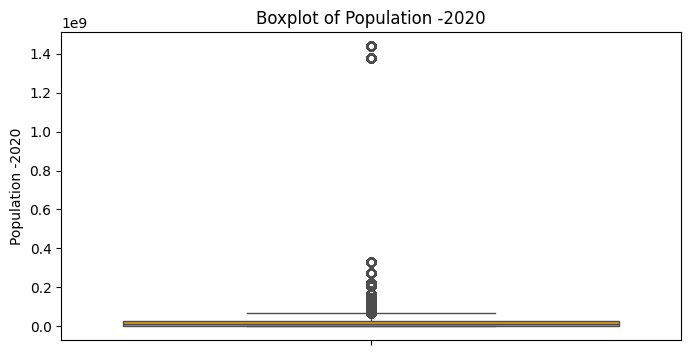

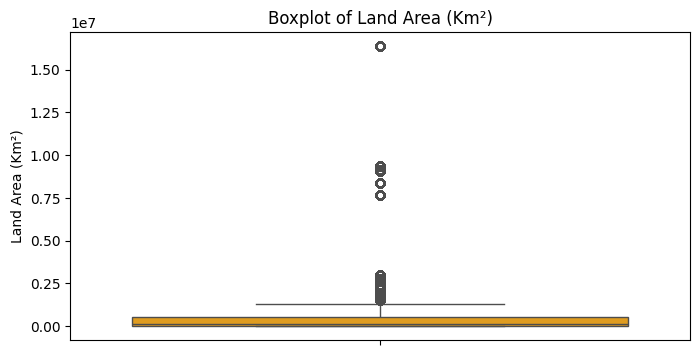

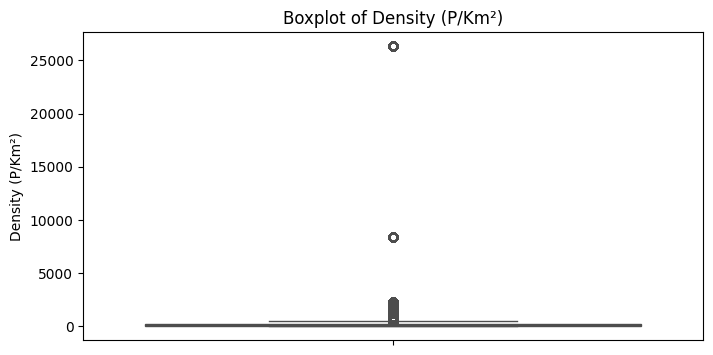

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#type des colonnes
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

#les distributions des colonnes quantitatives
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#correlations
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#Identifier et gérer les valeurs aberrantes dans les colonnes importantes.
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col].dropna(), color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()


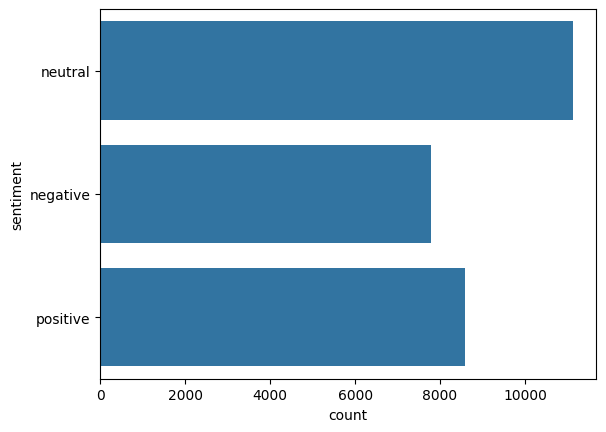

In [ ]:
sns.countplot(data['sentiment'])
plt.show()

# Nettoyage des Données

In [ ]:
from sklearn.preprocessing import StandardScaler

# Exclure la colonne 'selected_text' des colonnes catégoriques
categorical_columns = [col for col in categorical_columns if col != 'selected_text']

# Gérer les valeurs manquantes
missing_percentage = data.isnull().mean() * 100
print("Pourcentage de valeurs manquantes :\n", missing_percentage)

# Remplacer les valeurs manquantes dans les colonnes numériques
for col in numeric_columns:
    data[col] = data[col].fillna(data[col].mean())

# Remplacer les valeurs manquantes dans les colonnes catégoriques (sauf 'selected_text')
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Standardiser les colonnes numériques
scaler = StandardScaler()
data[numeric_columns] = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)

print("Colonnes numériques standardisées :\n", data[numeric_columns].head())


Pourcentage de valeurs manquantes :
 textID              0.000000
text                0.003639
selected_text       0.003639
sentiment           0.000000
Time of Tweet       0.000000
Age of User         0.000000
Country             0.000000
Population -2020    0.000000
Land Area (Km²)     0.000000
Density (P/Km²)     0.000000
dtype: float64
Colonnes numériques standardisées :
    Population -2020  Land Area (Km²)  Density (P/Km²)
0         -0.008350        -0.005153        -0.147830
1         -0.247902        -0.351209        -0.125483
2          0.024361         0.951408        -0.168687
3         -0.266511        -0.366109        -0.096184
4         -0.048632         0.323409        -0.164714


# Encodage des Données Catégoriques

In [ ]:
def handle_age(age):
    """
    Gère la colonne 'Age of User' :
    - Si c'est un intervalle calcule la médiane.
    - Si ce n'est pas un intervalle, retourne la valeur originale.
    """
    if isinstance(age, str) and '-' in age:
        try:
            bounds = list(map(int, age.split('-')))
            return sum(bounds) / 2
        except ValueError:
            pass
    return age


data['Age of User Encoded'] = data['Age of User'].apply(handle_age)


sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
data['sentiment Encoded'] = data['sentiment'].map(sentiment_mapping)


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Country', 'Time of Tweet']:
    data[col] = label_encoder.fit_transform(data[col])


data.head()


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Age of User Encoded,sentiment Encoded
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0,0-20,0,-0.008350,-0.005153,-0.147830,10.0,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2,21-30,1,-0.247902,-0.351209,-0.125483,25.5,-1
2,088c60f138,my boss is bullying me...,bullying me,negative,1,31-45,2,0.024361,0.951408,-0.168687,38.0,-1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0,46-60,3,-0.266511,-0.366109,-0.096184,53.0,-1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,2,60-70,4,-0.048632,0.323409,-0.164714,65.0,-1


In [ ]:
data.head(10)


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Age of User Encoded,sentiment Encoded
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0,0-20,0,-0.008350,-0.005153,-0.147830,10.0,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2,21-30,1,-0.247902,-0.351209,-0.125483,25.5,-1
2,088c60f138,my boss is bullying me...,bullying me,negative,1,31-45,2,0.024361,0.951408,-0.168687,38.0,-1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0,46-60,3,-0.266511,-0.366109,-0.096184,53.0,-1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,2,60-70,4,-0.048632,0.323409,-0.164714,65.0,-1
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,1,70-100,5,-0.266373,-0.366126,-0.066885,85.0,0
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,0,0-20,6,0.033296,1.147796,-0.169183,10.0,1
7,50e14c0bb8,Soooo high,Soooo high,neutral,2,21-30,7,-0.247334,-0.350617,-0.125979,25.5,0
8,e050245fbd,Both of you,Both of you,neutral,1,31-45,8,-0.097581,3.884120,-0.176136,38.0,0
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,0,46-60,9,-0.207178,-0.320779,-0.123496,53.0,1


# Préparation des Données Textuelles

# Normalisation


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

nltk.data.path.append('/content/nltk_data')
nltk.download('punkt', download_dir='/content/nltk_data')
nltk.download('stopwords', download_dir='/content/nltk_data')
nltk.download('wordnet', download_dir='/content/nltk_data')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

# Initialize NLTK objects
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:

#  preprocessing function
def preprocess_text(text):
    # Check if input is a string; if not, convert or return empty
    if not isinstance(text, str):
        return ""
    text = text.lower()  # Lowercase the text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@username)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(tokens)  # Join tokens back to string

# Handle missing values in the DataFrame
if 'text' in data.columns:
    # Replace NaN with empty strings before applying the function
    data['text'] = data['text'].fillna("")

    # Apply the preprocessing function
    data['cleaned_selected_text'] = data['text'].apply(preprocess_text)

else:
    print("Column 'selected_text' not found. Available columns:", data.columns)

# Display the first 15 rows of both original and cleaned text
data[['text', 'cleaned_selected_text']].head(8)


,text,cleaned_selected_text
0,"I`d have responded, if I were going",id responded going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego
2,my boss is bullying me...,bos bullying
3,what interview! leave me alone,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",son couldnt put release already bought
5,http://www.dothebouncy.com/smf - some shameles...,shameless plugging best ranger forum earth
6,2am feedings for the baby are fun when he is a...,feeding baby fun smile coo
7,Soooo high,soooo high


##Sentiment-Based Word Cloud Generation for Text **Analysis**

In [ ]:
# Creating a DataFrame for wordcloud
data1 = pd.DataFrame()
data1['text'] = data['cleaned_selected_text']  # Correct column name from 'data'
data1['sentiment'] = data['sentiment Encoded']  # Correct column name from 'data'
data1.head()


,text,sentiment
0,id responded going,0
1,sooo sad miss san diego,-1
2,bos bullying,-1
3,interview leave alone,-1
4,son couldnt put release already bought,-1


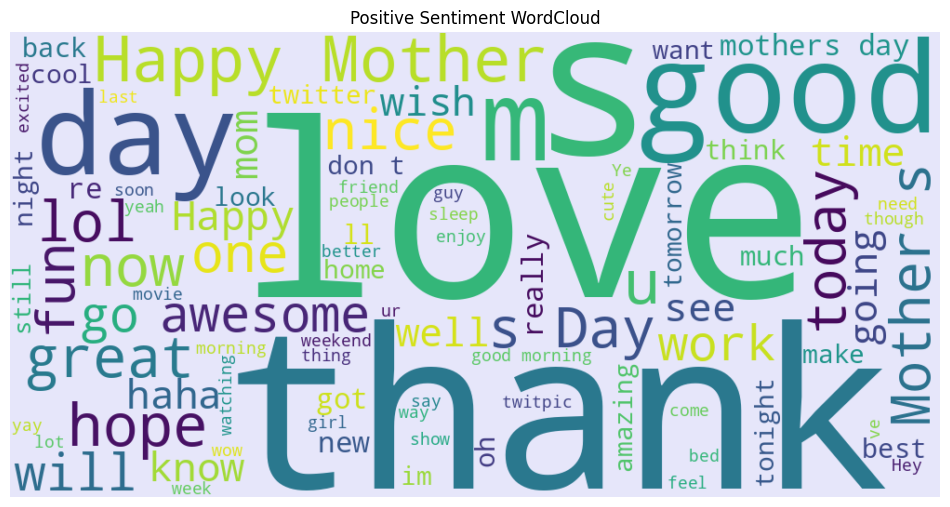

In [ ]:
from wordcloud import WordCloud

positive = data[data['sentiment Encoded'] == 1]
positive_list = positive['text'].tolist()

negative = data[data['sentiment Encoded'] == -1]
negative_list = negative['text'].tolist()

# Creating the text for word clouds
positive_all = " ".join([word for sent in positive_list for word in sent.split()])
negative_all = " ".join([word for sent in negative_list for word in sent.split()])

# Generating word clouds for positive sentiment
wordcloud_positive = WordCloud(width=1000,
                               height=500,
                               background_color='lavender',
                               max_words=90).generate(positive_all)

# Plotting the word cloud
plt.figure(figsize=(12,30))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Sentiment WordCloud")
plt.axis('off')
plt.show()


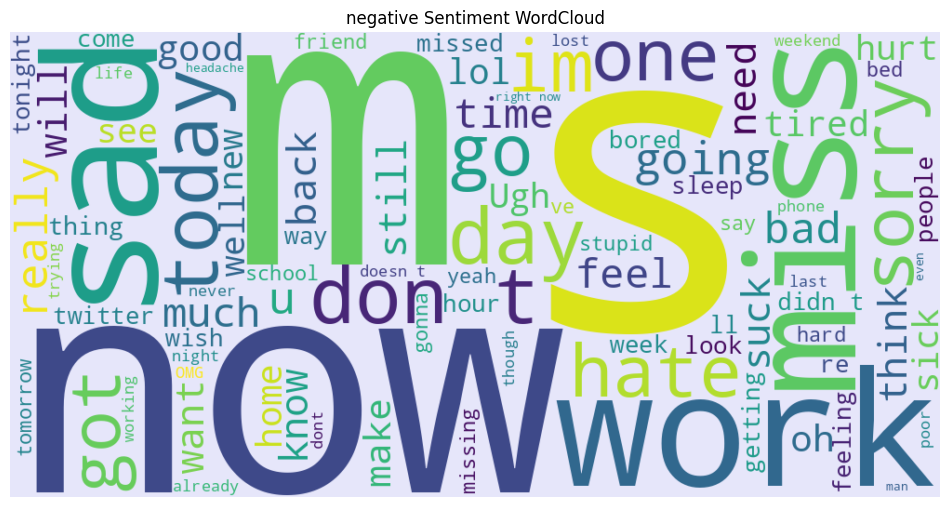

In [ ]:
# Generating word clouds for negative sentiment
wordcloud_negative = WordCloud(width=1000,
                               height=500,
                               background_color='lavender',
                               max_words=90).generate(negative_all)

# Plotting the word cloud
plt.figure(figsize=(12,30))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("negative Sentiment WordCloud")
plt.axis('off')
plt.show()

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data['cleaned_selected_text'])


# Division des Données

In [ ]:
from sklearn.model_selection import train_test_split
from scipy import sparse
X = sparse.hstack([
    vector,
    sparse.csr_matrix(data[['Age of User Encoded', 'Time of Tweet','Country']])
])
y = data['sentiment Encoded']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    stratify = y)


# Entraînement des Modèles

## Régression Logistique

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 0.6708567648031757
Precision: 0.689296427395439
Recall: 0.6708567648031757
F1 Score: 0.6702853969565465

Confusion Matrix:
 [[1409 1032  127]
 [ 451 2826  392]
 [  86  897 1849]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.72      0.55      0.62      2568
           0       0.59      0.77      0.67      3669
           1       0.78      0.65      0.71      2832

    accuracy                           0.67      9069
   macro avg       0.70      0.66      0.67      9069
weighted avg       0.69      0.67      0.67      9069



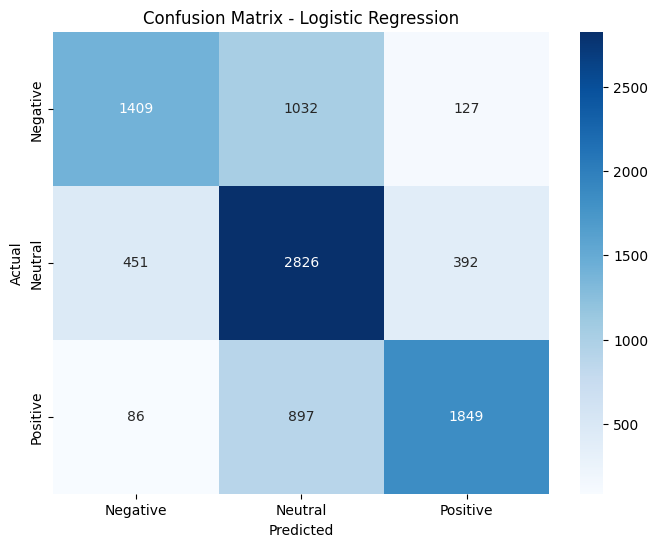

<ipython-input-16-55386c35042b>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_logistic, y=values_logistic, palette='viridis')


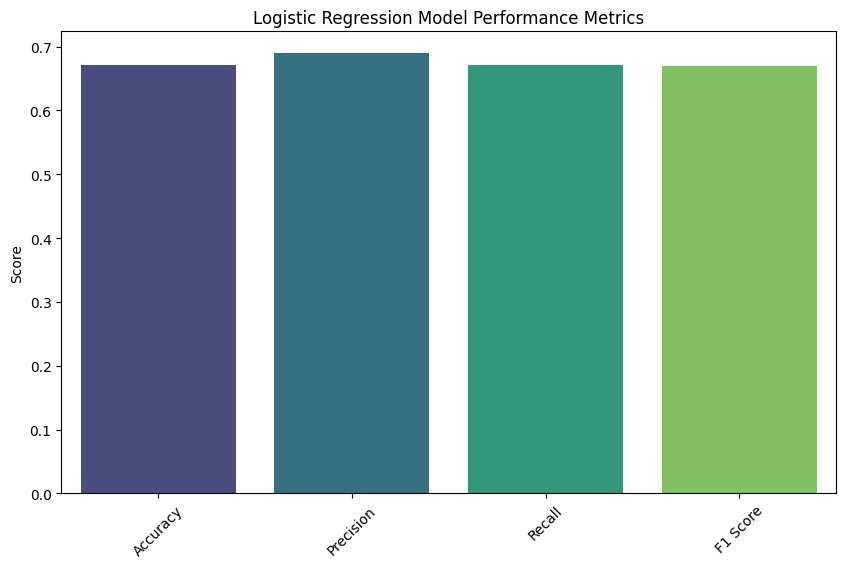

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Training and Evaluation
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Measure training time
start_time = time.time()
logistic_model.fit(X_train, y_train)

# Predict on Test Data (Logistic Regression)
logistic_predictions = logistic_model.predict(X_test)

# Evaluate Logistic Regression Performance
accuracy_logistic = accuracy_score(y_test, logistic_predictions)
precision_logistic = precision_score(y_test, logistic_predictions, average='weighted')
recall_logistic = recall_score(y_test, logistic_predictions, average='weighted')
f1_logistic = f1_score(y_test, logistic_predictions, average='weighted')

print("Logistic Regression Results:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))
print("\nClassification Report:\n", classification_report(y_test, logistic_predictions))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
conf_matrix_logistic = confusion_matrix(y_test, logistic_predictions)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar Plot for Metrics
metrics_logistic = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_logistic = [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_logistic, y=values_logistic, palette='viridis')
plt.title('Logistic Regression Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()




## Naive Bayes

Naive Bayes Results:
Accuracy: 0.5132870217223509
Precision: 0.6715767515726373
Recall: 0.5132870217223509
F1 Score: 0.44798630067649836

Confusion Matrix:
 [[ 306 2225   37]
 [  63 3478  128]
 [  16 1945  871]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.12      0.21      2568
           0       0.45      0.95      0.61      3669
           1       0.84      0.31      0.45      2832

    accuracy                           0.51      9069
   macro avg       0.70      0.46      0.42      9069
weighted avg       0.67      0.51      0.45      9069



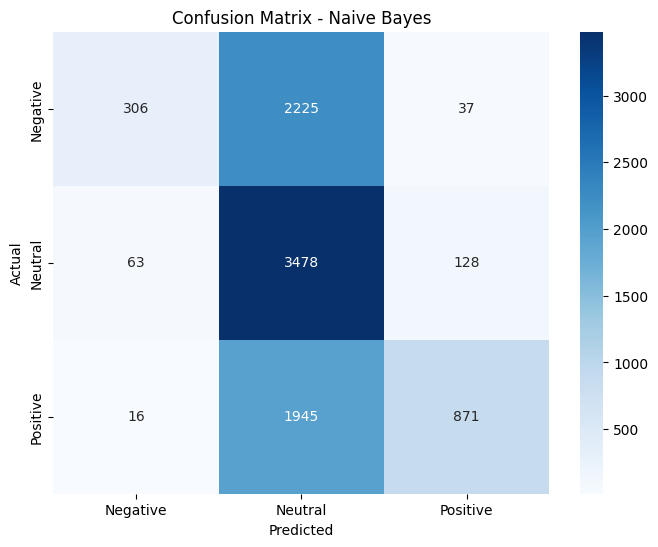

<ipython-input-22-08f9fa10e97a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_naive_bayes, y=values_naive_bayes, palette='coolwarm')


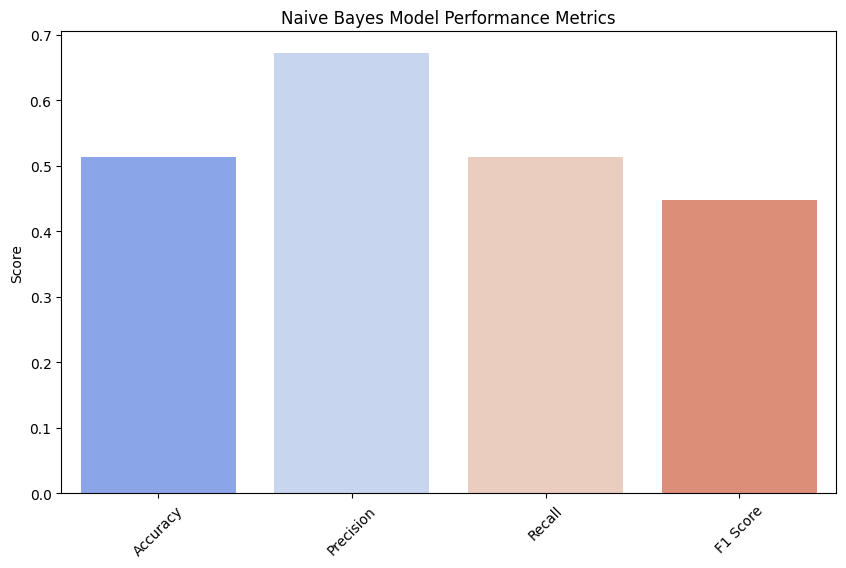

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Training and Evaluation
naive_bayes_model = MultinomialNB()

# Use only TF-IDF vectors for Naive Bayes (best suited for text data)
#X_train_tfidf = cleaned_selected_text_vector[:X_train.shape[0], :]
#X_test_tfidf = cleaned_selected_text_vector[X_train.shape[0]:, :]


naive_bayes_model.fit(X_train, y_train)

# Predict on Test Data (Naive Bayes)
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Evaluate Naive Bayes Performance
accuracy_naive_bayes = accuracy_score(y_test, naive_bayes_predictions)
precision_naive_bayes = precision_score(y_test, naive_bayes_predictions, average='weighted')
recall_naive_bayes = recall_score(y_test, naive_bayes_predictions, average='weighted')
f1_naive_bayes = f1_score(y_test, naive_bayes_predictions, average='weighted')

print("Naive Bayes Results:")
print("Accuracy:", accuracy_naive_bayes)
print("Precision:", precision_naive_bayes)
print("Recall:", recall_naive_bayes)
print("F1 Score:", f1_naive_bayes)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, naive_bayes_predictions))
print("\nClassification Report:\n", classification_report(y_test, naive_bayes_predictions))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
conf_matrix_naive_bayes = confusion_matrix(y_test, naive_bayes_predictions)
sns.heatmap(conf_matrix_naive_bayes, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar Plot for Metrics
metrics_naive_bayes = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_naive_bayes = [accuracy_naive_bayes, precision_naive_bayes, recall_naive_bayes, f1_naive_bayes]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_naive_bayes, y=values_naive_bayes, palette='coolwarm')
plt.title('Naive Bayes Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()





### evaluation

In [ ]:
cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)
print("Cross-Validation Scores for Naive Bayes:", cv_scores)


Cross-Validation Scores for Naive Bayes: [0.38594496 0.38799181 0.39981806 0.40413919 0.37010919]


## SVM (Support Vector Machines)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

SVM Results:
Accuracy: 0.35560701290109165
Precision: 0.2465708284929869
Recall: 0.35560701290109165
F1 Score: 0.2910540155295613

Confusion Matrix:
 [[1145 1423    0]
 [1589 2080    0]
 [1225 1607    0]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.29      0.45      0.35      2568
           0       0.41      0.57      0.47      3669
           1       0.00      0.00      0.00      2832

    accuracy                           0.36      9069
   macro avg       0.23      0.34      0.27      9069
weighted avg       0.25      0.36      0.29      9069



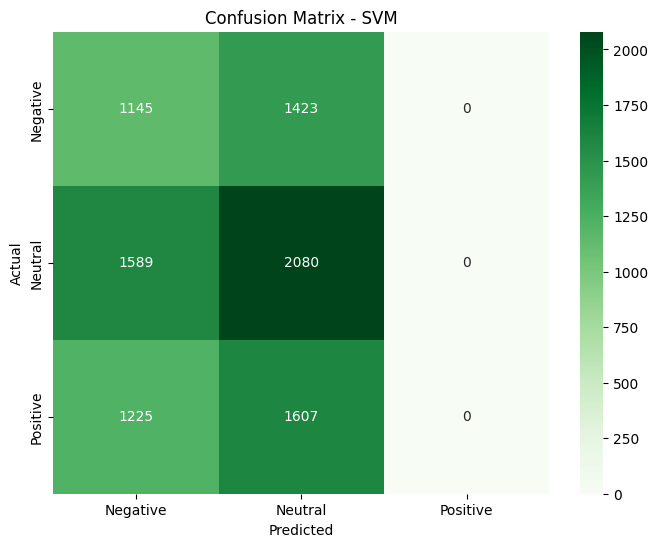

<ipython-input-23-cf473250b363>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_svm, y=values_svm, palette='magma')


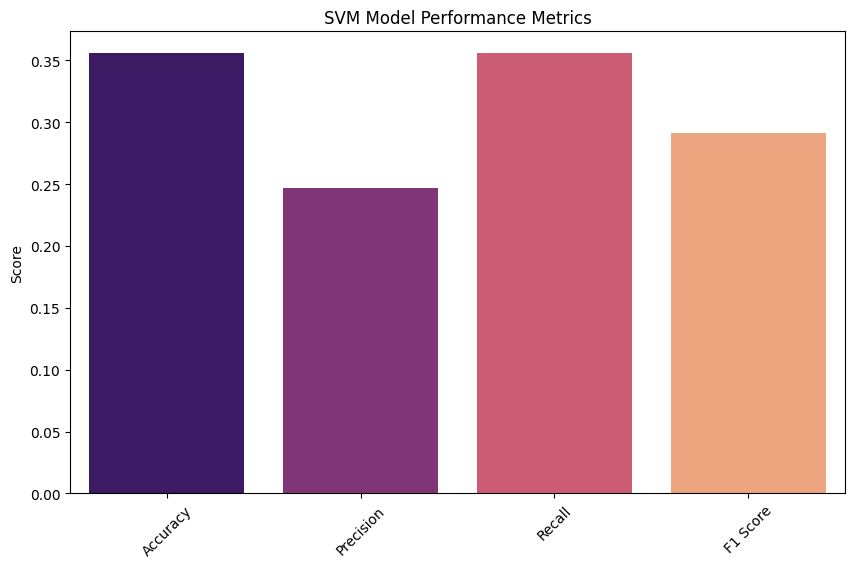

In [ ]:
# prompt: SVM

from sklearn.svm import SVC

# SVM Training and Evaluation
svm_model = SVC(kernel='sigmoid', random_state=42)  # You can experiment with different kernels

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

# Predict on Test Data (SVM)
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM Performance
accuracy_svm = accuracy_score(y_test, svm_predictions)
precision_svm = precision_score(y_test, svm_predictions, average='weighted')
recall_svm = recall_score(y_test, svm_predictions, average='weighted')
f1_svm = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Results:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar Plot for Metrics
metrics_svm = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_svm = [accuracy_svm, precision_svm, recall_svm, f1_svm]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_svm, y=values_svm, palette='magma')
plt.title('SVM Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


### evaluation

In [ ]:
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("Cross-Validation Scores for SVM:", cv_scores)

Cross-Validation Scores for SVM: [0.4045615  0.4045615  0.40439978 0.40467137 0.40467137]


## Réseaux de Neurones

In [ ]:
# prompt: neural network

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

y_train_shifted = y_train + 1
y_test_shifted = y_test + 1

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),  # Add dropout for regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_shifted, epochs=10, batch_size=32, validation_split=0.2)


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_shifted)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

y_pred_original = y_pred - 1

# Generate classification report
print(classification_report(y_test, y_pred_original))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.3758 - loss: 1.1489 - val_accuracy: 0.3980 - val_loss: 1.0888
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 37s 64ms/step - accuracy: 0.3993 - loss: 1.0889 - val_accuracy: 0.3980 - val_loss: 1.0879
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.4027 - loss: 1.0880 - val_accuracy: 0.3980 - val_loss: 1.0855
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.4089 - loss: 1.0828 - val_accuracy: 0.4200 - val_loss: 1.0670
Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.4467 - loss: 1.0539 - val_accuracy: 0.5534 - val_loss: 0.9684
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.4634 - loss: 1.0230 - val_accuracy: 0.5183 - val_loss: 0.9834
Epoch 7/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.4697 - loss: 1.0198 - val_accuracy: 0.5053 - val_loss: 0.9503
Epoch 8/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.4946 - loss: 0.9859 - 

Neural Network Results:
Accuracy: 0.5890395854008159
Precision: 0.7131849228193549
Recall: 0.5890395854008159
F1 Score: 0.5640026068726515

Confusion Matrix:
 [[ 831 1717   20]
 [ 172 3404   93]
 [  30 1695 1107]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.32      0.46      2568
           0       0.50      0.93      0.65      3669
           1       0.91      0.39      0.55      2832

    accuracy                           0.59      9069
   macro avg       0.74      0.55      0.55      9069
weighted avg       0.71      0.59      0.56      9069



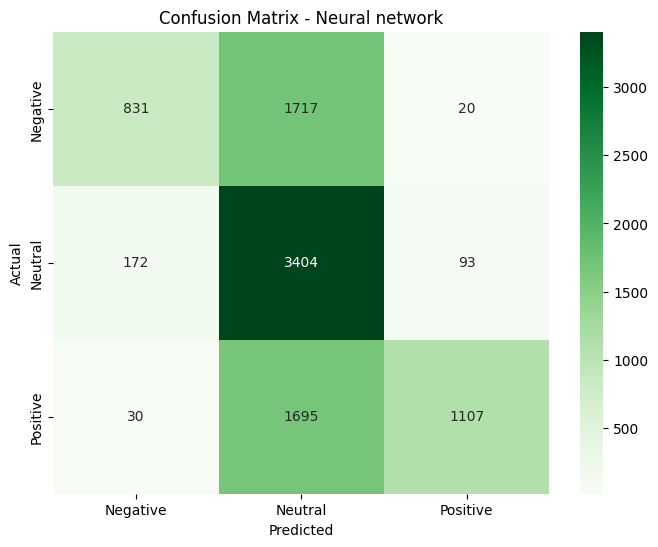

<ipython-input-29-fbc541e21a3f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_nn, y=values_nn, palette='magma')


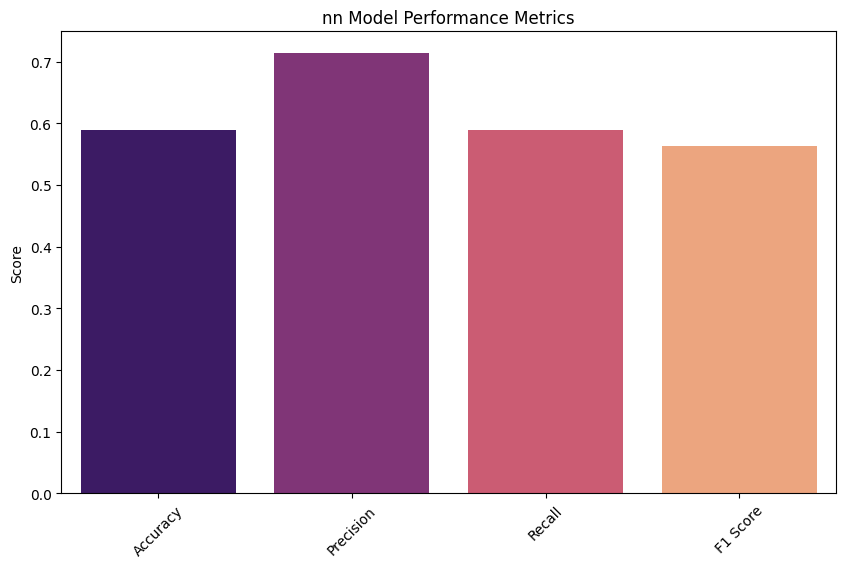

In [ ]:
# Evaluate neural network performance
accuracy_nn = accuracy_score(y_test, y_pred_original)  # Use y_pred_original
precision_nn = precision_score(y_test, y_pred_original, average='weighted') # Use y_pred_original
recall_nn = recall_score(y_test, y_pred_original, average='weighted') # Use y_pred_original
f1_nn = f1_score(y_test, y_pred_original, average='weighted') # Use y_pred_original


print("Neural Network Results:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_original))
print("\nClassification Report:\n", classification_report(y_test, y_pred_original))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
conf_matrix_nn = confusion_matrix(y_test, y_pred_original)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Neural network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar Plot for Metrics
metrics_nn = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_nn = [accuracy_nn, precision_nn, recall_nn, f1_nn]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_nn, y=values_nn, palette='magma')
plt.title('nn Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
